In [1]:
import pandas as pd

In [2]:
gvg_18 = pd.read_csv('EPA_gvg_18.csv')
gvg_08 = pd.read_csv('EPA_gvg_08.csv')

# Fuel economy data

### Not included in 2008 dataset:

Cert Region 	Certification Region<br>
Stnd Description 	Vehicle emissions standard description<br>
Comb CO2 	Combined city/highway CO2 tailpipe emissions in grams per mile

### Not included in 2018 dataset:</em>

Sales Area 	Certification Region Code


In [3]:
gvg_08.describe()

,Displ,Unadj Cmb MPG
count,2404.000000,2205.000000
mean,3.748918,23.916104
std,1.335785,6.366170
min,1.300000,10.018400
25%,2.500000,19.113900
50%,3.500000,23.921300
75%,4.800000,27.869300
max,8.400000,65.777800


In [4]:
gvg_18.describe()

,Displ,Cyl,Air Pollution Score,Greenhouse Gas Score
count,2612.000000,2612.000000,2648.000000,2648.000000
mean,3.018568,5.487749,4.124622,4.815332
std,1.307192,1.824197,1.928342,1.875487
min,0.600000,2.000000,1.000000,1.000000
25%,2.000000,4.000000,3.000000,3.750000
50%,2.900000,6.000000,3.000000,5.000000
75%,3.600000,6.000000,5.000000,6.000000
max,8.000000,16.000000,10.000000,10.000000


In [5]:
gvg_08.shape

(2404, 18)

In [6]:
gvg_18.shape

(2648, 18)

In [7]:
gvg_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [42]:
gvg_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [43]:
gvg_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


In [44]:
gvg_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 18 columns):
Model                   2648 non-null object
Displ                   2612 non-null float64
Cyl                     2612 non-null float64
Trans                   2648 non-null object
Drive                   2648 non-null object
Fuel                    2648 non-null object
Cert Region             2648 non-null object
Stnd                    2648 non-null object
Stnd Description        2648 non-null object
Underhood ID            2648 non-null object
Veh Class               2648 non-null object
Air Pollution Score     2648 non-null int64
City MPG                2648 non-null object
Hwy MPG                 2648 non-null object
Cmb MPG                 2648 non-null object
Greenhouse Gas Score    2648 non-null int64
SmartWay                2648 non-null object
Comb CO2                2648 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 372.5+ KB


In [45]:
gvg_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [46]:
gvg_18.nunique()

Model                   638
Displ                    44
Cyl                       9
Trans                    29
Drive                     2
Fuel                      6
Cert Region               2
Stnd                     24
Stnd Description         24
Underhood ID            409
Veh Class                10
Air Pollution Score       7
City MPG                111
Hwy MPG                 115
Cmb MPG                 106
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                404
dtype: int64

In [47]:
sum(gvg_08.duplicated())

25

In [48]:
sum(gvg_18.duplicated())

0

In [49]:
gvg_08.Fuel.unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [50]:
gvg_18.Fuel.unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Electricity',
       'Ethanol/Gas', 'Hydrogen'], dtype=object)

# Cleaning Column Labels

### Drop Extraneous Columns

In [51]:
# drop columns from 2008 dataset
gvg_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
gvg_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [52]:
# drop columns from 2018 dataset
gvg_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# confirm changes
gvg_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No


### Rename Columns

In [54]:
# rename Sales Area to Cert Region
gvg_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

# confirm changes
gvg_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [56]:
# replace spaces with underscores and lowercase labels for 2008 dataset
gvg_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
gvg_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [57]:
# replace spaces with underscores and lowercase labels for 2018 dataset
gvg_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
gvg_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No


In [59]:
# confirm column labels for 2008 and 2018 datasets are identical
gvg_08.columns == gvg_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [61]:
# make sure they're all identical like this
(gvg_08.columns == gvg_18.columns).all()

True

In [63]:
# save new datasets for next section
gvg_08.to_csv('data_08.csv', index=False)
gvg_18.to_csv('data_18.csv', index=False)

# Filter, Drop Nulls, Dedupe
Use `data_08.csv` and `data_18.csv`

In [65]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('data_08.csv')
df_18 = pd.read_csv('data_18.csv')

In [66]:
# view dimensions of dataset
df_08.shape

(986, 13)

In [67]:
# view dimensions of dataset
df_18.shape

(1282, 13)

## Filter by Certification Region

In [68]:
# filter datasets for rows following California standards
df_08 = df_08[df_08['cert_region'] == 'CA']
df_18 = df_18[df_18['cert_region'] == 'CA']

KeyError: 'cert_region'

In [12]:
# confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [13]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [16]:
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


In [17]:
df_08.shape

(1084, 13)

In [18]:
df_18.shape

(1307, 13)

## Drop Rows with Missing Values

In [22]:
# view missing value count for each feature in 2008
df_08.isnull().values.ravel().sum()

487

In [25]:
# view missing value count for each feature in 2018
df_18.isnull().values.ravel().sum()

30

In [36]:
# drop rows with any null values in both datasets
df_08 = df_08.dropna()
df_18 = df_18.dropna()

In [37]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [38]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

## Dedupe Data

In [40]:
# print number of duplicates in 2008 and 2018 datasets
sum(df_08.duplicated())

23

In [41]:
sum(df_18.duplicated())

10

In [42]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [43]:
# print number of duplicates again to confirm dedupe - should both be 0
print (sum(df_08.duplicated()))
print (sum(df_18.duplicated()))

0
0


In [44]:
# save progress for the next section
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

# Inspecting Data Types

In [69]:
df_08.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
2,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
3,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
4,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [70]:
df_18.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,25,35,29,6,No
1,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,3,26,27,27,6,No
2,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,3,19,27,22,4,No
3,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,3,20,27,23,5,No
4,ACURA MDX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small SUV,3,18,26,21,4,No


In [74]:
df_08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [72]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

# Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [75]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

Read [this](https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas) to help you extract ints from strings in Pandas for the next step.

In [76]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d)', expand=False).astype(int)

In [78]:
# Check value counts for 2008 cyl column again to confirm the change
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [81]:
import numpy as np
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].apply(np.int64)

In [82]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [83]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

# Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [1]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('data_08.csv')
df_18 = pd.read_csv('data_18.csv')

# Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the value at row 582 is "6/4" - let's check it out.

In [2]:
df_08.iloc[582]

model                   MERCEDES-BENZ C300
displ                                    3
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 582, dtype: object

# It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [3]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


Looks like this dataset only has one! The 2018 has MANY more - but don't worry - the steps I'm taking here will work for that as well!

In [4]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
25,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite
83,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
109,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
110,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
125,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [5]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [6]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [7]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [8]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [9]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [10]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [11]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [12]:
df_08.shape

(987, 13)

# Repeat this process for the 2018 dataset

In [13]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_08.copy()

### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`
You don't need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2018 dataset.

In [14]:
df_18.tail()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1277,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small SUV,7,26/60,28/58,26/59,10,Elite
1278,VOLVO XC 90,2.0,4,SemiAuto-8,2WD,Gasoline,standard SUV,5,22,29,25,5,No
1279,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,5,22,28,24,5,No
1280,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,5,20,27,23,5,No
1281,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,7,26/63,30/61,27/62,10,Elite


In [15]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,small car,3,25,35,29,6,No
1,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,small SUV,3,26,27,27,6,No
2,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3,19,27,22,4,No
3,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3,20,27,23,5,No
4,ACURA MDX,3.5,6,SemiAuto-9,4WD,Gasoline,small SUV,3,18,26,21,4,No


In [16]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [17]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

In [18]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [19]:
df_18.shape

(1283, 13)

### Now we can comfortably continue the changes needed for `air_pollution_score`! Here they are again:
- 2008: convert string to float
- 2018: convert int to float

In [20]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [21]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = pd.to_numeric(df_08['air_pollution_score'], downcast='float')
print (df_08.dtypes)

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float32
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object


In [49]:
df_18.iloc[1282]

IndexError: single positional indexer is out-of-bounds

In [45]:
# fixing the one 'air polution with a dubble nr:'
df_18.drop(1282 , inplace=True)
df_18.tail()


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1277,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Ethanol,standard SUV,5,9,13,10,1,No
1278,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Ethanol,pickup,5,9,12,10,2,No
1279,VOLVO S90,2.0,4,SemiAuto-8,4WD,Gasoline,midsize car,7,26,33,29,10,Elite
1280,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Gasoline,small SUV,7,26,28,26,10,Elite
1281,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,7,26,30,27,10,Elite


In [48]:
# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = pd.to_numeric(df_18['air_pollution_score'], downcast='float')
print (df_18.dtypes)

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float32
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object


In [47]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
df_08 = pd.read_csv('data_08.csv')
df_18 = pd.read_csv('data_18.csv')

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [2]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = pd.to_numeric(df_18[c], downcast='float')
    df_08[c] = pd.to_numeric(df_08[c], downcast='float')

In [3]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float32
hwy_mpg                 float32
cmb_mpg                 float32
greenhouse_gas_score      int64
smartway                 object
dtype: object

## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [4]:
# convert from float to int
df_08['greenhouse_gas_score'] = pd.to_numeric(df_08['greenhouse_gas_score'], downcast='integer')

## All the dataypes are now fixed! Take one last check to confirm all the changes.

In [5]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float32
hwy_mpg                 float32
cmb_mpg                 float32
greenhouse_gas_score       int8
smartway                 object
dtype: object

In [6]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float32
hwy_mpg                 float32
cmb_mpg                 float32
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [7]:
df_08.dtypes == df_18.dtypes

model                    True
displ                    True
cyl                      True
trans                    True
drive                    True
fuel                     True
veh_class                True
air_pollution_score      True
city_mpg                 True
hwy_mpg                  True
cmb_mpg                  True
greenhouse_gas_score    False
smartway                 True
dtype: bool

In [8]:
# Save your new CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

# Exploring with Visuals
Use `clean_08.csv` and `clean_18.csv`

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_18.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,25.0,35.0,29.0,6,No
1,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6,No
2,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
3,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
4,ACURA MDX,3.5,6,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No


(array([ 25.,  16.,  64.,  82., 114., 166., 279., 163.,  66.,  12.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

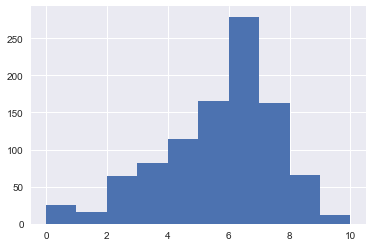

In [11]:
plt.hist(df_08['greenhouse_gas_score'])

(array([ 27.,  56., 239., 266., 339., 170.,  94.,  44.,  14.,  33.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

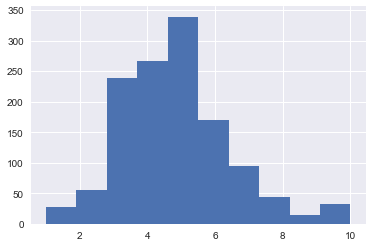

In [12]:
plt.hist(df_18['greenhouse_gas_score'])

city_mpg
hwy_mpg
cmb_mpg

(array([ 40., 241., 287., 289.,  96.,  25.,   7.,   0.,   1.,   1.]),
 array([ 31. ,  41.8,  52.6,  63.4,  74.2,  85. ,  95.8, 106.6, 117.4,
        128.2, 139. ]),
 <a list of 10 Patch objects>)

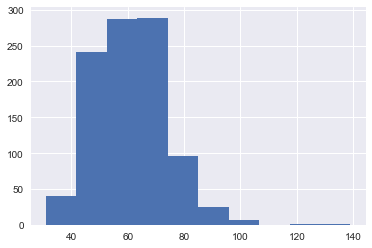

In [14]:
plt.hist(df_08['city_mpg'] + df_08['hwy_mpg'] + df_08['cmb_mpg'])

(array([ 54., 258., 408., 362., 130.,  39.,  17.,   5.,   5.,   4.]),
 array([ 31. ,  45.3,  59.6,  73.9,  88.2, 102.5, 116.8, 131.1, 145.4,
        159.7, 174. ]),
 <a list of 10 Patch objects>)

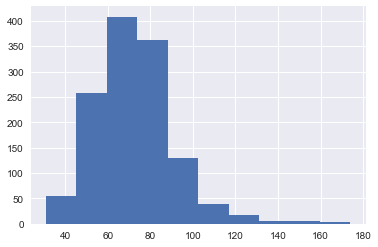

In [15]:
plt.hist(df_18['city_mpg'] + df_18['hwy_mpg'] + df_18['cmb_mpg'])

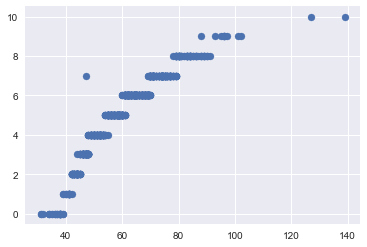

In [19]:
plt.scatter(x=(df_08['city_mpg'] + df_08['hwy_mpg'] + df_08['cmb_mpg']), y=df_08['greenhouse_gas_score'])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_18.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,25.0,35.0,29.0,6,No
1,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6,No
2,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
3,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
4,ACURA MDX,3.5,6,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [3]:
df_08.fuel.value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [7]:
df_18.fuel.value_counts()

Gasoline    1210
Ethanol       41
Diesel        31
Name: fuel, dtype: int64

In [8]:
#df.query('radius > 13.375')

In [6]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [ ]:
alt_18 = df_18.query('["CNG"]')

### Q2: How much have vehicle classes improved in fuel economy?  

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

### Q4: What features are associated with better fuel economy?